<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/2.%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021.01.04 한번 더 보자

출처 : https://wikidocs.net/53560

참고 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/2.%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80(Linear_Regression).ipynb 

#2. 선형회귀(Linear Regression)

## 2.1 선형회귀(Linear Regression)

이번 챕터에서는 선형 회귀 이론에 대해서 이해하고, 파이토치(PyTorch)를 이용하여 선형 회귀 모델을 만들어보겠습니다.

* 데이터에 대한 이해(Data Definition)

학습할 데이터에 대해서 알아봅니다.

* 가설(Hypothesis) 수립

가설을 수립하는 방법에 대해서 알아봅니다.

* 손실 계산하기(Compute loss)

학습 데이터를 이용해서 연속적으로 모델을 개선시키는데 이 때 손실(loss)를 이용합니다.

* 경사 하강법(Gradient Descent)

학습을 위한 핵심 알고리즘인 경사 하강법(Gradient Descent)에 대해서 이해합니다.



### 2.1.1 데이터에 대한 이해(Data Definition)

이번 챕터에서 선형 회귀를 위해 사용할 예제는 공부한 시간과 점수에 대한 상관관계입니다.

1. 훈련 데이터셋과 테스트 데이터셋

![](https://wikidocs.net/images/page/53560/data_definition.PNG)

어떤 학생이 1시간 공부를 했더니 2점, 다른 학생이 2시간 공부를 했더니 4점, 또 다른 학생이 3시간을 공부했더니 6점을 맞았습니다. 

그렇다면, 내가 4시간을 공부한다면 몇 점을 맞을 수 있을까요?

![](https://wikidocs.net/images/page/53560/linear_regression.PNG)

이 질문에 대답하기 위해서 1시간, 2시간, 3시간을 공부했을 때 각각 2점, 4점, 6점이 나왔다는 앞서 나온 정보를 이용해야 합니다. 

이때 예측을 위해 사용하는 데이터를 훈련 데이터셋(training dataset)이라고 합니다. 

학습이 끝난 후, 이 모델이 얼마나 잘 작동하는지 판별하는 데이터셋을 테스트 데이터셋(test dataset)이라고 합니다.

2. 훈련 데이터셋의 구성

앞서 텐서에 대해서 배웠는데, 모델을 학습시키기 위한 데이터는 파이토치의 텐서의 형태(torch.tensor)를 가지고 있어야 합니다. 

그리고 입력과 출력을 각기 다른 텐서에 저장할 필요가 있습니다. 

이때 보편적으로 입력은 x, 출력은 y를 사용하여 표기합니다.

여기서 x_train은 공부한 시간, y_train은 그에 맵핑되는 점수를 의미합니다.

In [2]:
import torch

In [3]:
x_train = torch.FloatTensor([[1], 
                             [2], 
                             [3]])
y_train = torch.FloatTensor([[2], 
                             [4], 
                             [6]])

![](https://wikidocs.net/images/page/53560/tensor1.PNG)

이제 모델의 가설을 세워보겠습니다.

### 2.1.2 가설(Hypothesis) 수립

머신 러닝에서 식을 세울때 이 식을 가설(Hypothesis)라고 합니다. 

보통 머신 러닝에서 가설은 임의로 추측해서 세워보는 식일수도 있고, 경험적으로 알고 있는 식일 수도 있습니다. 

그리고 맞는 가설이 아니라고 판단되면 계속 수정해나가게 되는 식이기도 합니다.

선형 회귀의 가설은 이미 널리 알려져있으므로 고민할 필요가 없습니다. 

선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다. 

이때 선형 회귀의 가설(직선의 방정식)은 아래와 같은 형식을 가집니다.

$y=Wx+b$

가설의 $H$를 따서 $y$ 대신 다음과 같이 식을 표현하기도 합니다.

$H(x)=Wx+b$

이때 $x$와 곱해지는 $W$를 가중치(Weight)라고 하며, $b$를 편향(bias)이라고 합니다.

$W$와 $b$는 중학교 수학 과정인 직선의 방정식에서 기울기와 $y$절편에 해당됩니다.

직선의 방정식 링크 : https://mathbang.net/443

###2.1.3 비용 함수(Cost function)에 대한 이해

앞으로 딥 러닝을 학습하면서 인터넷에서 이런 용어들을 본다면, 전부 같은 용어로 생각하면 되겠습니다.

비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)

특히 비용 함수와 손실 함수란 용어는 기억해두는 것이 좋습니다.

비용 함수에 대해서 이해하기 위해서 여기서만 잠깐 새로운 예제를 사용해보겠습니다.

어떤 4개의 훈련 데이터가 있고, 이를 2차원 그래프에 4개의 점으로 표현한 상태라고 하겠습니다.

![](https://wikidocs.net/images/page/53560/%EA%B7%B8%EB%A6%BC1.PNG)

지금 목표는 4개의 점을 가장 잘 표현하는 직선을 그리는 일입니다. 임의로 3개의 직선을 그려보겠습니다.

![](https://wikidocs.net/images/page/53560/%EA%B7%B8%EB%A6%BC2.PNG)

위의 그림은 서로 다른 W와 b의 값에 따라서 천차만별로 그려진 3개의 직선의 모습을 보여줍니다. 

이 3개의 직선 중에서 4개의 점을 가장 잘 반영한 직선은 어떤 직선인가요? 

검은색 직선이라고 말하는 사람도 있을 것이고, 잘 모르겠다고 말하는 사람도 있을 것입니다. 

검은색 직선이라고 말하는 사람은 검은색 직선이 가장 4개의 점에 가깝게 지나가는 느낌을 받고 있기 때문입니다.

하지만 수학에서 느낌이라는 표현을 사용하는 것은 아무런 의미도 없습니다. 

어떤 직선이 가장 적절한 직선인지를 수학적인 근거를 대서 표현할 수 있어야 합니다. 

그래서 오차(error)라는 개념을 도입하겠습니다.

![](https://wikidocs.net/images/page/53560/%EA%B7%B8%EB%A6%BC3.PNG)

위 그림은 임의로 그려진 주황색 선에 대해서 각 실제값(4개의 점)과 직선의 예측값(동일한 $x$값에서의 직선의 $y$값)에 대한 값의 차이를 빨간색 화살표 ↕로 표현한 것입니다. 

각 실제값과 각 예측값과의 차이고, 이를 각 실제값에서의 오차라고 말할 수 있습니다. 

이 직선의 예측값들과 실제값들과의 총 오차(total error)는 어떻게 구할까요? 

직관적으로 생각하기에 모든 오차를 다 더하면 될 것 같습니다. 

각 오차를 전부 더해봅시다.

위 주황색 직선의 식은 $y=13x+1$이며, 각 오차는 다음과 같습니다.

|hours(x)|2|3|4|5|
|--------|-|-|-|-|
|실제값|25|50|42|61|
|예측값|27|40|53|66|
|오차|-2|10|-7|-5|

각 오차를 계산해봤습니다. 

그런데 수식적으로 단순히 '오차 = 실제값 - 예측값'으로 정의하면 오차값이 음수가 나오는 경우가 생깁니다. 

예를 들어 위의 표에서만 봐도 오차가 음수인 경우가 3번이나 됩니다.

이 경우, 오차를 모두 더하면 덧셈 과정에서 오차값이 +가 되었다가 -되었다가 하므로 제대로 된 오차의 크기를 측정할 수 없습니다. 

그래서 오차를 그냥 전부 더하는 것이 아니라, 각 오차들을 제곱해준 뒤에 전부 더하겠습니다.

이를 수식으로 표현하면 아래와 같습니다. 

단, 여기서 n은 갖고 있는 데이터의 개수를 의미합니다.

$∑i=1n[y(i)−H(x(i))]^2=(−2)^2+10^2+(−7)^2+(−5)^2=178$

이때 데이터의 개수인 n으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 평균 제곱 오차(Mean Squared Error, MSE)라고 합니다. 

수식은 아래와 같습니다.

$1n∑i=1n[y(i)−H(x(i))]^2=178/4=44.5$

이를 실제로 계산하면 44.5가 됩니다. 

이는 $y=13x+1$의 예측값과 실제값의 평균 제곱 오차의 값이 44.5임을 의미합니다.

평균 제곱 오차는 이번 회귀 문제에서 적절한 $W$와 $b$를 찾기위해서 최적화된 식입니다. 

그 이유는 평균 제곱 오차의 값을 최소값으로 만드는 $W$와 $b$를 찾아내는 것이 가장 훈련 데이터를 잘 반영한 직선을 찾아내는 일이기 때문입니다.

평균 제곱 오차를 $W$와 $b$에 의한 비용 함수(Cost function)로 재정의해보면 다음과 같습니다.

$cost(W,b)=1n∑i=1n[y(i)−H(x(i))]^2$

다시 정리하겠습니다. 

$Cost(W,b)$를 최소가 되게 만드는 $W$와 $b$를 구하면 훈련 데이터를 가장 잘 나타내는 직선을 구할 수 있습니다.



### 2.1.4 옵티마이저 - 경사 하강법(Gradient Descent)

이제 앞서 정의한 비용 함수(Cost Function)의 값을 최소로 하는 $W$와 $b$를 찾는 방법에 대해서 배울 차례입니다. 

이때 사용되는 것이 옵티마이저(Optimizer) 알고리즘입니다. 

최적화 알고리즘이라고도 부릅니다. 

그리고 이 옵티마이저 알고리즘을 통해 적절한 $W$와 $b$를 찾아내는 과정을 머신 러닝에서 학습(training)이라고 부릅니다. 

여기서는 가장 기본적인 옵티마이저 알고리즘인 경사 하강법(Gradient Descent)에 대해서 배웁니다.

이번 설명에서 편향 $b$는 고려하지 않겠습니다. 

즉, $b$가 0이라고 가정한 $y=Wx$와 같은 식을 기준으로 설명합니다.

![](https://wikidocs.net/images/page/53560/%EA%B7%B8%EB%A6%BC4.PNG)

가중치 $W$가 직선의 방정식에서는 기울기였음을 기억합시다. 

이제 $W$를 기울기라고 명명하고 설명합니다.

위의 그림에서 주황색선은 기울기 $W$가 20일 때, 초록색선은 기울기 $W$가 1일 때를 보여줍니다. 

다시 말하면 각각 $y=20x$, $y=x$에 해당되는 직선입니다. 

↕는 각 점에서의 실제값과 두 직선의 예측값과의 오차를 보여줍니다. 

이는 앞서 예측에 사용했던 $y=13x+1$ 직선보다 확연히 큰 오차값들입니다. 

즉, 기울기가 지나치게 크면 실제값과 예측값의 오차가 커지고, 기울기가 지나치게 작아도 실제값과 예측값의 오차가 커집니다. 

사실 $b$ 또한 마찬가지인데 $b$가 지나치게 크거나 작으면 오차가 커집니다.

설명의 편의를 위해 편향 $b$가 없이 단순히 가중치 $W$만을 사용한 $H(x)=Wx$라는 가설을 가지고, 경사 하강법을 설명하겠습니다. 

비용 함수의 값 $cost(W)$는 $cost$라고 줄여서 표현해보겠습니다. 

이에 따라 $W$와 $cost$의 관계를 그래프로 표현하면 다음과 같습니다.

![](https://wikidocs.net/images/page/21670/%EA%B8%B0%EC%9A%B8%EA%B8%B0%EC%99%80%EC%BD%94%EC%8A%A4%ED%8A%B8.PNG)

기울기 $W$가 무한대로 커지면 커질 수록 $cost$의 값 또한 무한대로 커지고, 반대로 기울기 $W$가 무한대로 작아져도 $cost$의 값은 무한대로 커집니다. 

위의 그래프에서 $cost$가 가장 작을 때는 맨 아래의 볼록한 부분입니다. 

기계가 해야할 일은 $cost$가 가장 최소값을 가지게 하는 W를 찾는 일이므로, 맨 아래의 볼록한 부분의 $W$의 값을 찾아야 합니다.

![](https://wikidocs.net/images/page/21670/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.PNG)

기계는 임의의 초기값 $W$값을 정한 뒤에, 맨 아래의 볼록한 부분을 향해 점차 $W$의 값을 수정해나갑니다. 

위의 그림은 $W$값이 점차 수정되는 과정을 보여줍니다. 

그리고 이를 가능하게 하는 것이 경사 하강법(Gradient Descent)입니다. 

이를 이해하기 위해서는 고등학교 수학 과정인 미분을 이해해야 합니다. 

경사 하강법은 미분을 배우게 되면 가장 처음 배우게 되는 개념인 한 점에서의 순간 변화율 또는 접선에서의 기울기의 개념을 사용합니다.

![](https://wikidocs.net/images/page/21670/%EC%A0%91%EC%84%A0%EC%9D%98%EA%B8%B0%EC%9A%B8%EA%B8%B01.PNG)

위의 그림에서 초록색 선은 W가 임의의 값을 가지게 되는 네 가지의 경우에 대해서, 그래프 상으로 접선의 기울기를 보여줍니다. 

주목할 것은 맨 아래의 볼록한 부분으로 갈수록 접선의 기울기가 점차 작아진다는 점입니다. 

그리고 맨 아래의 볼록한 부분에서는 결국 접선의 기울기가 0이 됩니다. 

그래프 상으로는 초록색 화살표가 수평이 되는 지점입니다.

즉, cost가 최소화가 되는 지점은 접선의 기울기가 0이 되는 지점이며, 또한 미분값이 0이 되는 지점입니다. 

경사 하강법의 아이디어는 비용 함수(Cost function)를 미분하여 현재 $W$에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 $W$의 값을 변경하는 작업을 반복하는 것에 있습니다.

이 반복 작업에는 현재 $W$에 접선의 기울기를 구해 특정 숫자 $α$를 곱한 값을 빼서 새로운 $W$로 사용하는 식이 사용됩니다.

$기울기 = \frac{∂cost(W)}{∂W}$

기울기가 음수일 때와 양수일 때 어떻게 $W$ 값이 조정되는지 보겠습니다.

* 기울기가 음수일 때 : $W$의 값이 증가

$W := W - α × (음수 기울기) = W + α × (양수 기울기)$

기울기가 음수면 $W$의 값이 증가하는데 이는 결과적으로 접선의 기울기가 0인 방향으로 $W$의 값이 조정됩니다.

만약, 접선의 기울기가 양수라면 위의 수식은 아래와 같이 표현할 수 있습니다.

* 기울기가 양수일 때 : $W$의 값이 감소

$W := W - α × (양수 기울기)$

기울기가 양수면 $W$의 값이 감소하게 되는데 이는 결과적으로 기울기가 0인 방향으로 $W$의 값이 조정됩니다. 

즉, 아래의 수식은 접선의 기울기가 음수거나, 양수일 때 모두 접선의 기울기가 0인 방향으로 $W$의 값을 조정합니다.

$W := W - α\frac{∂}{∂W}cost(W)$

그렇다면 여기서 학습률(learning rate)이라고 말하는 $α$는 어떤 의미를 가질까요? 

학습률 $α$은 $W$의 값을 변경할 때, 얼마나 크게 변경할지를 결정합니다. 

또는 $W$를 그래프의 한 점으로보고 접선의 기울기가 0일 때까지 경사를 따라 내려간다는 관점에서는 얼마나 큰 폭으로 이동할지를 결정합니다. 

직관적으로 생각하기에 학습률 $α$의 값을 무작정 크게 하면 접선의 기울기가 최소값이 되는 $W$를 빠르게 찾을 수 있을 것같지만 그렇지 않습니다.

![](https://wikidocs.net/images/page/21670/%EA%B8%B0%EC%9A%B8%EA%B8%B0%EB%B0%9C%EC%82%B0.PNG)

위의 그림은 학습률 $α$가 지나치게 높은 값을 가질 때, 접선의 기울기가 0이 되는 $W$를 찾아가는 것이 아니라 $W$의 값이 발산하는 상황을 보여줍니다. 

반대로 학습률 $α$가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 $α$의 값을 찾아내는 것도 중요합니다.

지금까지는 $b$는 배제시키고 최적의 $W$를 찾아내는 것에만 초점을 맞추어 경사 하강법의 원리에 대해서 배웠는데, 실제 경사 하강법은 $W$와 $b$에 대해서 동시에 경사 하강법을 수행하면서 최적의 $W$와 $b$의 값을 찾아갑니다.

가설, 비용 함수, 옵티마이저는 머신 러닝 분야에서 사용되는 포괄적 개념입니다.

풀고자하는 각 문제에 따라 가설, 비용 함수, 옵티마이저는 전부 다를 수 있으며 선형 회귀에 가장 적합한 비용 함수는 평균 제곱 오차, 옵티마이저는 경사 하강법입니다.

이제 가설, 비용 함수, 옵티마이저에 대해서 학습하였으니 파이토치로 구현해보겠습니다.


### 2.1.5 파이토치로 선형 회귀 구현하기

우선 실습을 위해 파이토치의 도구들을 임포트하는 기본 셋팅을 진행합니다.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # 파이썬 코드를 재실행해도 같은 결과가 나오도록 랜덤 시드(random seed)를 준다.

실습을 위한 기본적인 셋팅이 끝났습니다. 이제 훈련 데이터인 x_train과 y_train을 선언합니다.

In [5]:
x_train = torch.FloatTensor([[1],
                            [2],
                            [3]])
y_train = torch.FloatTensor([[2],
                            [4],
                            [6]])

x_train과 x_train의 크기(shape)를 출력해보겠습니다.

In [6]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


x_train의 값이 출력되고, x_train의 크기가 (3 × 1)임을 알 수 있습니다.

y_train과 y_train의 크기(shape)를 출력해보겠습니다.

In [7]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


y_train의 값이 출력되고, y_train의 크기가 (3 × 1)임을 알 수 있습니다.

선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다.

그리고 가장 잘 맞는 직선을 정의하는 것은 바로 W와 b입니다.

w와 b로 이루어진 직선은 다음과 같습니다.

$y = W*x + b$

선형 회귀의 목표는 가장 잘 맞는 직선을 정의하는 W와 b의 값을 찾는 것입니다.

우선 가중치 W를 0으로 초기화하고, 이 값을 출력해보겠습니다.

In [10]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.

W = torch.zeros(1, requires_grad=True) 

# requres_grad=True는 텐서에 행해지는 모든 연산에 대해 미분값을 계산한다.

# 학습을 통해 계속 값이 변경되는 변수임을 의미한다.

print(W)

tensor([0.], requires_grad=True)


가중치 W가 0으로 초기화되어있으므로 0이 출력된 것을 확인할 수 있습니다. 위에서 requires_grad=True가 인자로 주어진 것을 확인할 수 있습니다. 이는 이 변수는 학습을 통해 계속 값이 변경되는 변수임을 의미합니다.

마찬가지로 편향 b도 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시합니다.

In [11]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


현재 가중치 $W$와 $b$ 둘 다 0이므로 현 직선의 방정식은 다음과 같습니다.

$y=0×x+0$

지금 상태에선 $x$에 어떤 값이 들어가도 가설은 0을 예측하게 됩니다. 

즉, 아직 적절한 $W$와 $b$의 값이 아닙니다.

파이토치 코드 상으로 직선의 방정식에 해당되는 가설을 선언합니다.

In [12]:
hypothesis = W * x_train + b
print(hypothesis)
print(hypothesis.size())

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)
torch.Size([3, 1])


파이토치 코드 상으로 선형 회귀의 비용 함수에 해당되는 평균 제곱 오차를 선언합니다.

$cost(W,b) = \frac{1}{n}\sum_{i=1}^{n}[H(x^{(i)}) - y^{(i)}]^{2}$

In [13]:
# 앞서 배운 torch.mean으로 평균을 구한다.
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


이제 경사 하강법을 구현합니다. 

아래의 'SGD'는 경사 하강법의 일종입니다. 

lr은 학습률(learning rate)를 의미합니다.

학습 대상인 $W$와 $b$가 SGD의 입력이 됩니다.



In [14]:
optimizer = optim.SGD([W, b], lr=0.01) 
#학습 대상인 W와 b가 SGD에 입력된다. lr은 학습률(learnign rate)을 의미한다.

In [15]:
optimizer.zero_grad() # 미분을 통해 얻은 기울기를 0으로 초기화한다. 

cost.backward() # 가중치 W와 편향 b에 대한 기울기가 계산된다.

optimizer.step() # 인수로 들어갔던 W와 b에 리턴되는 변수들의 기울기에 학습률을 곱하여 빼줌으로써 업데이트한다.

optimizer.zero_grad()를 실행하므로서 미분을 통해 얻은 기울기를 0으로 초기화합니다. 

기울기를 초기화해야만 새로운 가중치와 편향에 대해서 새로운 기울기를 구할 수 있습니다. 

그 다음 cost.backward() 함수를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산됩니다.

그 다음 경사 하강법 최적화 함수 opimizer의 .step() 함수를 호출하여 인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 학습률(learining rate) 0.01을 곱하여 빼줌으로서 업데이트합니다.

* 텐서에는 requires_grad라는 속성이 있습니다. 이것을 True로 설정하면 자동 미분 기능이 적용됩니다. 선형 회귀부터 신경망과 같은 복잡한 구조에서 파라미터들이 모두 이 기능이 적용됩니다. requires_grad = True가 적용된 텐서에 연산을 하면, 계산 그래프가 생성되며 backward 함수를 호출하면 그래프로부터 자동으로 미분이 계산됩니다.


* requires_grad=True와 backward()에 대한 정리는 자동 미분(Autograd) 챕터에 별도 정리하였습니다.


In [17]:
print(W)
print(b)

tensor([0.1867], requires_grad=True)
tensor([0.0800], requires_grad=True)


여기까지를 다시 한번에 보자

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # 파이썬 코드를 재실행해도 같은 결과가 나오도록 랜덤 시드(random seed)를 준다.

# 데이터
x_train = torch.FloatTensor([[1],
                             [2],
                             [3]])
y_train = torch.FloatTensor([[2],
                             [4],
                             [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{nb_epochs} W: {round(W.item(),3)} b: {round(b.item(),3)} Cost: {round(cost.item(),3)}')

Epoch 0/2000 W: 0.187 b: 0.08 Cost: 18.667
Epoch 100/2000 W: 1.746 b: 0.578 Cost: 0.048
Epoch 200/2000 W: 1.8 b: 0.454 Cost: 0.03
Epoch 300/2000 W: 1.843 b: 0.357 Cost: 0.018
Epoch 400/2000 W: 1.876 b: 0.281 Cost: 0.011
Epoch 500/2000 W: 1.903 b: 0.221 Cost: 0.007
Epoch 600/2000 W: 1.924 b: 0.174 Cost: 0.004
Epoch 700/2000 W: 1.94 b: 0.136 Cost: 0.003
Epoch 800/2000 W: 1.953 b: 0.107 Cost: 0.002
Epoch 900/2000 W: 1.963 b: 0.084 Cost: 0.001
Epoch 1000/2000 W: 1.971 b: 0.066 Cost: 0.001
Epoch 1100/2000 W: 1.977 b: 0.052 Cost: 0.0
Epoch 1200/2000 W: 1.982 b: 0.041 Cost: 0.0
Epoch 1300/2000 W: 1.986 b: 0.032 Cost: 0.0
Epoch 1400/2000 W: 1.989 b: 0.025 Cost: 0.0
Epoch 1500/2000 W: 1.991 b: 0.02 Cost: 0.0
Epoch 1600/2000 W: 1.993 b: 0.016 Cost: 0.0
Epoch 1700/2000 W: 1.995 b: 0.012 Cost: 0.0
Epoch 1800/2000 W: 1.996 b: 0.01 Cost: 0.0
Epoch 1900/2000 W: 1.997 b: 0.008 Cost: 0.0
Epoch 2000/2000 W: 1.997 b: 0.006 Cost: 0.0


결과적으로 훈련 과정에서 $W$와 $b$는 훈련 데이터와 잘 맞는 직선을 표현하기 위한 적절한 값으로 변화해갑니다.

에포크(Epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말합니다.

이번 실습의 경우 2,000번을 수행했습니다.

최종 훈련 결과를 보면 최적의 기울기 W는 2에 가깝고, b는 0에 가까운 것을 볼 수 있습니다.

현재 훈련 데이터가 x_train은 [[1], [2], [3]]이고 y_train은 [[2], [4], [6]]인 것을 감안하면
실제 정답은 $W$가 2이고, $b$가 0인 $H(x)=2x$이므로 거의 정답을 찾은 셈입니다.



### 2.1.6 optimizer.zero_grad()가 필요한 이유

파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있습니다. 

예를 들어봅시다.

In [19]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    z=2*w
    
    z.backward()
    print(f'수식을 w로 미분한 값:{w.grad}')

수식을 w로 미분한 값:2.0
수식을 w로 미분한 값:4.0
수식을 w로 미분한 값:6.0
수식을 w로 미분한 값:8.0
수식을 w로 미분한 값:10.0
수식을 w로 미분한 값:12.0
수식을 w로 미분한 값:14.0
수식을 w로 미분한 값:16.0
수식을 w로 미분한 값:18.0
수식을 w로 미분한 값:20.0
수식을 w로 미분한 값:22.0
수식을 w로 미분한 값:24.0
수식을 w로 미분한 값:26.0
수식을 w로 미분한 값:28.0
수식을 w로 미분한 값:30.0
수식을 w로 미분한 값:32.0
수식을 w로 미분한 값:34.0
수식을 w로 미분한 값:36.0
수식을 w로 미분한 값:38.0
수식을 w로 미분한 값:40.0
수식을 w로 미분한 값:42.0


계속해서 미분값인 2가 누적되는 것을 볼 수 있습니다. 

그렇기 때문에 optimizer.zero_grad()를 통해 미분값을 계속 0으로 초기화시켜줘야 합니다.

### 2.1.7 torch.manual_seed()를 하는 이유

torch.manual_seed()를 사용한 프로그램의 결과는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있습니다. 

그 이유는 torch.manual_seed()는 난수 발생 순서와 값을 동일하게 보장해준다는 특징때문입니다. 

우선 랜덤 시드가 3일 때 두 번 난수를 발생시켜보고, 다른 랜덤 시드를 사용한 후에 다시 랜덤 시드를 3을 사용한다면 난수 발생값이 동일하게 나오는지 보겠습니다.

In [20]:
import torch
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


In [21]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


In [22]:
torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1,3):
  print(torch.rand(1))


랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


## 2.2 자동 미분(Autograd)

경사 하강법 코드를 보고있으면 requires_grad=True, backward() 등이 나옵니다.

이는 파이토치에서 제공하고 있는 자동 미분(Autograd) 기능을 수행하고 있는 것입니다. 

파이토치의 학습 과정을 보다 더 잘 이해하기 위해서 자동 미분에 대해서 이해해봅시다.

### 2.2.1 경사 하강법 리뷰

![](https://wikidocs.net/images/page/21670/%EC%A0%91%EC%84%A0%EC%9D%98%EA%B8%B0%EC%9A%B8%EA%B8%B01.PNG)

경사 하강법을 간단히 복습해보겠습니다. 

경사 하강법은 비용 함수를 미분하여 이 함수의 기울기(gradient)를 구해서 비용이 최소화 되는 방향을 찾아내는 알고리즘이었습니다.

비용 함수를 손실 함수, 오차 함수라고도 부르므로 비용이 최소화 되는 방향이라는 표현 대신 손실이 최소화 되는 방향 또는 오차를 최소화 되는 방향이라고도 설명할 수 있습니다.

모델이 복잡해질수록 경사 하강법을 넘파이 등으로 직접 코딩하는 것은 까다로운 일입니다. 

파이토치에서는 이런 수고를 하지 않도록 자동 미분(Autograd)을 지원합니다.

자동 미분을 사용하면 미분 계산을 자동화하여 경사 하강법을 손쉽게 사용할 수 있게 해줍니다.



### 2.2.2 자동 미분(Autograd) 실습하기


자동 미분에 대해서 실습을 통해 이해해봅시다. 

임의로 $2w^2+5$라는 식을 세워보고, $w$에 대해 미분해보겠습니다.

값이 2인 임의의 스칼라 텐서 $w$를 선언합니다. 

이때 required_grad를 True로 설정합니다. 

이는 이 텐서에 대한 기울기를 저장하겠다는 의미입니다. 

뒤에서 보겠지만, 이렇게 하면 w.grad에 $w$에 대한 미분값이 저장됩니다.



In [23]:
import torch

w = torch.tensor(2.0, requires_grad=True)

이제 수식을 정의합니다.

In [24]:
y = w**2
z = 2*y + 5

이제 해당 수식을 w에 대해서 미분해야합니다. 

.backward()를 호출하면 해당 수식의 w에 대한 기울기를 계산합니다.

In [25]:
z.backward()

이제 w.grad를 출력하면 w가 속한 수식을 w로 미분한 값이 저장된 것을 확인할 수 있습니다.

In [26]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


## 2.3 다중 선형 회귀(Multivariable Linear regression)

앞서 배운 $x$가 1개인 선형 회귀를 단순 선형 회귀(Simple Linear Regression)이라고 합니다.

이번 챕터에서는 다수의 $x$로부터 $y$를 예측하는 다중 선형 회귀(Multivariable Linear Regression)에 대해서 이해합니다.

### 2.3.1 데이터에 대한 이해(Data Definition)

다음과 같은 훈련 데이터가 있습니다. 

앞서 배운 단순 선형 회귀와 다른 점은 독립 변수 $x$의 개수가 이제 1개가 아닌 3개라는 점입니다. 

3개의 퀴즈 점수로부터 최종 점수를 예측하는 모델을 만들어보겠습니다.

![](https://wikidocs.net/images/page/54841/%ED%9B%88%EB%A0%A8%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG)

독립 변수 $x$의 개수가 3개므로 이를 수식으로 표현하면 아래와 같습니다.

$H(x)=w1x1+w2x2+w3x3+b$

### 2.3.2 파이토치로 구현하기

우선 필요한 도구들을 임포트하고 랜덤 시드를 고정합니다.

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

이제 훈련 데이터를 선언해보겠습니다.

$H(x)=w1x1+w2x2+w3x3+b$

위의 식을 보면 이번에는 단순 선형 회귀와 다르게 $x$의 개수가 3개입니다.

그러니까 $x$를 3개 선언합니다.

In [28]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

이제 가중치 $w$와 편향 $b$를 선언합니다. 

가중치 $w$도 3개 선언해주어야 합니다.

In [29]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

이제 가설, 비용 함수, 옵티마이저를 선언한 후에 경사 하강법을 1,000회 반복합니다.

In [30]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


위의 경우 가설을 선언하는 부분인 hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b에서도 x_train의 개수만큼 w와 곱해주도록 작성해준 것을 확인할 수 있습니다.

### 2.3.3 벡터와 행렬 연산으로 바꾸기

위의 코드를 개선할 수 있는 부분이 있습니다. 

이번에는 $x$의 개수가 3개였으니까 x1_train, x2_train, x3_train와 $w1$, $w2$, $w3$를 일일히 선언해주었습니다. 

그런데 $x$의 개수가 1,000개라고 가정해봅시다. 

위와 같은 방식을 고수할 경우 x_train1 ~ x_train1000을 전부 선언하고, $w1$ ~ $w1000$을 전부 선언해야 합니다. 

다시 말해 $x$와 $w$ 변수 선언만 총 합 2,000개를 해야합니다. 

또한 가설을 선언하는 부분에서도 마찬가지로 x_train과 $w$의 곱셈이 이루어지는 항을 1,000개를 작성해야 합니다. 

이는 굉장히 비효율적입니다.

이를 해결하기 위해 행렬 곱셈 연산(또는 벡터의 내적)을 사용합니다.

행렬의 곱셈 과정에서 이루어지는 벡터 연산을 벡터의 내적(Dot Product)이라고 합니다.

![](https://wikidocs.net/images/page/54841/%ED%96%89%EB%A0%AC%EA%B3%B1.PNG)

위의 그림은 행렬 곱셈 연산 과정에서 벡터의 내적으로 1 × 7 + 2 × 9 + 3 × 11 = 58이 되는 과정을 보여줍니다.

이 행렬 연산이 어떻게 현재 배우고 있는 가설과 상관이 있다는 걸까요?

바로 가설을 벡터와 행렬 연산으로 표현할 수 있기 때문입니다.

1. 벡터 연산으로 이해하기

$H(X)=w1x1+w2x2+w3x3$

위 식은 아래와 같이 두 벡터의 내적으로 표현할 수 있습니다.

![](https://wikidocs.net/images/page/54841/%EB%82%B4%EC%A0%81.PNG)

두 벡터를 각각 $X$와 $W$로 표현한다면, 가설은 다음과 같습니다.

$H(X)=XW$

$x$의 개수가 3개였음에도 이제는 $X$와 $W$라는 두 개의 변수로 표현된 것을 볼 수 있습니다.

2. 행렬 연산으로 이해하기
훈련 데이터를 살펴보고, 벡터와 행렬 연산을 통해 가설 $H(X)$를 표현해보겠습니다.

![](https://wikidocs.net/images/page/54841/%ED%9B%88%EB%A0%A8%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG)

전체 훈련 데이터의 개수를 셀 수 있는 1개의 단위를 샘플(sample)이라고 합니다. 

현재 샘플의 수는 총 5개입니다.

각 샘플에서 $y$를 결정하게 하는 각각의 독립 변수 x를 특성(feature)이라고 합니다. 

현재 특성은 3개입니다.

이는 종속 변수 $x$들의 수가 (샘플의 수 × 특성의 수) = 15개임을 의미합니다. 

종속 변수 $x$들을 (샘플의 수 × 특성의 수)의 크기를 가지는 하나의 행렬로 표현해봅시다. 

그리고 이 행렬을 $X$라고 하겠습니다.

$\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ \\
      x_{21}\ x_{22}\ x_{23}\ \\
      x_{31}\ x_{32}\ x_{33}\ \\
      x_{41}\ x_{42}\ x_{43}\ \\
      x_{51}\ x_{52}\ x_{53}\ \\
    \end{array}
  \right)$

  그리고 여기에 가중치 $w1,w2,w3$을 원소로 하는 벡터를 $W$라 하고 이를 곱해보겠습니다.

  $\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ \\
      x_{21}\ x_{22}\ x_{23}\ \\
      x_{31}\ x_{32}\ x_{33}\ \\
      x_{41}\ x_{42}\ x_{43}\ \\
      x_{51}\ x_{52}\ x_{53}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
    \end{array}
  \right)
\  =
\left(
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3}\ \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3}\ \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3}\ \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3}\ \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3}\ \\
    \end{array}
  \right)$

  위의 식은 결과적으로 다음과 같습니다.

$H(X)=XW$

이 가설에 각 샘플에 더해지는 편향 $b$를 추가해봅시다. 

샘플 수만큼의 차원을 가지는 편향 벡터 $B$를 만들어 더합니다.

$\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ \\
      x_{21}\ x_{22}\ x_{23}\ \\
      x_{31}\ x_{32}\ x_{33}\ \\
      x_{41}\ x_{42}\ x_{43}\ \\
      x_{51}\ x_{52}\ x_{53}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b \\
      b \\
      b \\
      b \\
      b \\
    \end{array}
  \right)
 \ =
\left(
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3} + b\ \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3} + b\ \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3} + b\ \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3} + b\ \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3} + b\ \\
    \end{array}
  \right)$

  위의 식은 결과적으로 다음과 같습니다.

$H(X)=XW+B$

결과적으로 전체 훈련 데이터의 가설 연산을 3개의 변수만으로 표현하였습니다.

이와 같이 벡터와 행렬 연산은 식을 간단하게 해줄 뿐만 아니라 다수의 샘플의 병렬 연산이므로 속도의 이점을 가집니다.

이를 참고로 파이토치로 구현해봅시다.

### 2.3.4 행렬 연산을 고려하여 파이토치로 구현하기

이번에는 행렬 연산을 고려하여 파이토치로 재구현해보겠습니다.

이번에는 훈련 데이터 또한 행렬로 선언해야 합니다.



In [31]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],
                               [185],
                               [180],
                               [196],
                               [142]])

이전에 x_train을 3개나 구현했던 것과 다르게 이번에는 x_train 하나에 모든 샘플을 전부 선언하였습니다. 

다시 말해 (5 x 3) 행렬 X을 선언한 것입니다.

x_train과 y_train의 크기(shape)를 출력해보겠습니다.

In [32]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


각각 (5 × 3) 행렬과 (5 × 1) 행렬(또는 벡터)의 크기를 가집니다.

이제 가중치 $W$와 편향 $b$를 선언합니다.

In [33]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

여기서 주목할 점은 가중치 $W$의 크기가 (3 × 1) 벡터라는 점입니다. 

행렬의 곱셈이 성립되려면 곱셈의 좌측에 있는 행렬의 열의 크기와 우측에 있는 행렬의 행의 크기가 일치해야 합니다. 

현재 X_train의 행렬의 크기는 (5 × 3)이며, W 벡터의 크기는 (3 × 1)이므로 두 행렬과 벡터는 행렬곱이 가능합니다. 

행렬곱으로 가설을 선언하면 아래와 같습니다.


In [34]:
hypothesis = x_train.matmul(W) + b

가설을 행렬곱으로 간단히 정의하였습니다. 

이는 앞서 x_train과 $w$의 곱셈이 이루어지는 각 항을 전부 기재하여 가설을 선언했던 것과 대비됩니다. 

이 경우, 사용자가 독립 변수 $x$의 수를 후에 추가적으로 늘리거나 줄이더라도 위의 가설 선언 코드를 수정할 필요가 없습니다. 

이제 해야할 일은 비용 함수와 옵티마이저를 정의하고, 정해진 에포크만큼 훈련을 진행하는 일입니다. 

이를 반영한 전체 코드는 다음과 같습니다.



In [35]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  
                               [185],  
                               [180],  
                               [196],  
                               [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))


Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936096
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371063
Epoch    6/20 hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) Cost: 29.758249
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) Cost: 10.445267
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391237
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493121
Epoch   10/20 hypo

## 2.4 nn.Module로 구현하는 선형 회귀

이전 챕터까지는 선형 회귀를 좀 더 직접적으로 이해하기 위해 가설, 비용 함수를 직접 정의해서 선형 회귀 모델을 구현했습니다. 

이번에는 파이토치에서 이미 구현되어져 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 선형 회귀 모델을 구현해보겠습니다.

예를 들어 파이토치에서는 선형 회귀 모델이 nn.Linear()라는 함수로, 또 평균 제곱오차가 nn.functional.mse_loss()라는 함수로 구현되어져 있습니다. 

아래는 이번 실습에서 사용할 두 함수의 사용 예제를 간단히 보여줍니다.

In [36]:
import torch.nn as nn
model = nn.Linear(input_dim, output_dim)

NameError: ignored

In [37]:
import torch.nn.functional as F
cost = F.mse_loss(prediction, y_train)

NameError: ignored

### 2.4.1 단순 선형 회귀 구현하기


In [38]:
#우선 필요한 도구들을 임포트합니다.

import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)

이제 데이터를 선언합니다. 

아래 데이터는 $y=2x$를 가정된 상태에서 만들어진 데이터로 우리는 이미 정답이 $W=2, b=0$임을 알고 있는 사태입니다. 

모델이 이 두 $W$와 $b$의 값을 제대로 찾아내도록 하는 것이 목표입니다.



In [39]:
# 데이터
x_train = torch.FloatTensor([[1], 
                             [2], 
                             [3]])
y_train = torch.FloatTensor([[2], 
                             [4], 
                             [6]])


데이터를 정의하였으니 이제 선형 회귀 모델을 구현할 차례입니다.

nn.Linear()는 입력의 차원, 출력의 차원을 인수로 받습니다.



In [40]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

위 torch.nn.Linear 인자로 1, 1을 사용하였습니다. 

하나의 입력 $x$에 대해서 하나의 출력 $y$을 가지므로, 입력 차원과 출력 차원 모두 1을 인수로 사용하였습니다. 

model에는 가중치 $W$와 편향 $b$가 저장되어져 있습니다. 

이 값은 model.parameters()라는 함수를 사용하여 불러올 수 있는데, 한 번 출력해보겠습니다.

In [41]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


2개의 값이 출력되는데 첫번째 값이 $W$고, 두번째 값이 $b$에 해당됩니다. 

두 값 모두 현재는 랜덤 초기화가 되어져 있습니다. 

그리고 두 값 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있습니다.

이제 옵티마이저를 정의합니다. 

model.parameters()를 사용하여 $W$와 $b$를 전달합니다.

학습률(learning rate)은 0.01로 정합니다.

In [42]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [43]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


학습이 완료되었습니다. 

Cost의 값이 매우 작습니다. 

$W$와 $b$의 값도 최적화가 되었는지 확인해봅시다.

$x$에 임의의 값 4를 넣어 모델이 예측하는 $y$의 값을 확인해보겠습니다.

In [44]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)


사실 이 문제의 정답은 $y=2x$가 정답이므로 $y$값이 8에 가까우면 $W$와 $b$의 값이 어느정도 최적화가 된 것으로 볼 수 있습니다. 

실제로 예측된 $y$값은 7.9989로 8에 매우 가깝습니다.

이제 학습 후의 $W$와 $b$의 값을 출력해보겠습니다.


In [45]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


$W$의 값이 2에 가깝고, $b$의 값이 0에 가까운 것을 볼 수 있습니다.

$H(x)$ 식에 입력 $x$로부터 예측된 $y$를 얻는 것을 forward 연산이라고 합니다.

학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산입니다.

학습 후, pred_y = model(new_var)는 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산입니다.

학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 합니다.

cost.backward()는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산입니다.


### 2.4.2 다중 선형 회귀 구현하기

이제 nn.Linear()와 nn.functional.mse_loss()로 다중 선형 회귀를 구현해봅시다.

 사실 코드 자체는 달라지는 건 거의 없는데, nn.Linear()의 인자값과 학습률(learning rate)만 조절해주었습니다.

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)

이제 데이터를 선언해줍니다. 

여기서는 3개의 $x$로부터 하나의 $y$를 예측하는 문제입니다.

즉, 가설 수식은 $H(x)=w1x1+w2x2+w3x3+b$입니다.



In [47]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], 
                             [185], 
                             [180], 
                             [196], 
                             [142]])


데이터를 정의하였으니 이제 선형 회귀 모델을 구현할 차례입니다. 

nn.Linear()는 입력의 차원, 출력의 차원을 인수로 받습니다.


In [48]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

위 torch.nn.Linear 인자로 3, 1을 사용하였습니다. 

3개의 입력 $x$에 대해서 하나의 출력 $y$을 가지므로, 입력 차원은 3, 출력 차원은 1을 인수로 사용하였습니다. 

model에는 3개의 가중치 $w$와 편향 $b$가 저장되어져 있습니다. 

이 값은 model.parameters()라는 함수를 사용하여 불러올 수 있는데, 한 번 출력해보겠습니다.



In [49]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


첫번째 출력되는 것이 3개의 $w$고, 두번째 출력되는 것이 $b$에 해당됩니다. 

두 값 모두 현재는 랜덤 초기화가 되어져 있습니다. 

그리고 두 출력 결과 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있습니다.

이제 옵티마이저를 정의합니다.

 model.parameters()를 사용하여 3개의 $w와 b$를 전달합니다. 
 
 학습률(learning rate)은 0.00001로 정합니다. 
 
 파이썬 코드로는 1e-5로도 표기합니다. 
 
 0.01로 하지 않는 이유는 기울기가 발산하기 때문입니다. 
 
 궁금하다면 해보시기 바랍니다.

 ![](https://wikidocs.net/images/page/21670/%EA%B8%B0%EC%9A%B8%EA%B8%B0%EB%B0%9C%EC%82%B0.PNG)

 위의 그림은 앞서 배웠던 내용으로, 학습률(learning rate)이 모델의 필요한 크기보다 높을 때, 기울기가 발산하는 현상을 보여줍니다.

In [50]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [51]:
#이하 코드는 단순 선형 회귀를 구현했을 때와 동일합니다.

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


학습이 완료되었습니다. 

Cost의 값이 매우 작습니다. 

3개의 $w와 b$의 값도 최적화가 되었는지 확인해봅시다.

$x$에 임의의 입력 [73, 80, 75]를 넣어 모델이 예측하는 $y$의 값을 확인해보겠습니다.

In [52]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward>)


사실 3개의 값 73, 80, 75는 훈련 데이터로 사용되었던 값입니다. 

당시 $y$의 값은 152였는데, 현재 예측값이 151이 나온 것으로 보아 어느정도는 3개의 $w$와 $b$의 값이 최적화 된것으로 보입니다. 

이제 학습 후의 3개의 $w$와 $b$의 값을 출력해보겠습니다.



In [53]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


## 2.5 클래스로 파이토치 모델 구현하기

파이토치의 대부분의 구현체들은 대부분 모델을 생성할 때 클래스(Class)를 사용하고 있습니다. 

앞서 배운 선형 회귀를 클래스로 구현해보겠습니다. 

앞서 구현한 코드와 다른 점은 오직 클래스로 모델을 구현했다는 점입니다.


### 2.5.1 모델을 클래스로 구현하기


앞서 단순 선형 회귀 모델은 다음과 같이 구현했었습니다.

In [54]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

이를 클래스로 구현하면 다음과 같습니다.

In [55]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

위와 같은 클래스를 사용한 모델 구현 형식은 대부분의 파이토치 구현체에서 사용하고 있는 방식으로 반드시 숙지할 필요가 있습니다.

클래스(class) 형태의 모델은 nn.Module 을 상속받습니다. 

그리고 __init__()에서 모델의 구조와 동적을 정의하는 생성자를 정의합니다.

 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다. 
 
 super() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화 됩니다. 
 
 foward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수입니다. 
 
 이 forward() 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행이됩니다. 
 
 예를 들어 model이란 이름의 객체를 생성 후, model(입력 데이터)와 같은 형식으로 객체를 호출하면 자동으로 forward 연산이 수행됩니다.

* $H(x)$ 식에 입력 $x$로부터 예측된 $y$를 얻는 것을 forward 연산이라고 합니다.

앞서 다중 선형 회귀 모델은 다음과 같이 구현했었습니다.

In [56]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

이를 클래스로 구현하면 다음과 같습니다.

In [57]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)
        
model = MultivariateLinearRegressionModel()


### 2.5.2 단순 선형 회귀 클래스로 구현하기


이제 모델을 클래스로 구현한 코드를 보겠습니다. 

달라진 점은 모델을 클래스로 구현했다는 점 뿐입니다. 

다른 코드는 전부 동일합니다.



In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], 
                             [2], 
                             [3]])
y_train = torch.FloatTensor([[2], 
                             [4], 
                             [6]])

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


### 2.5.3 다중 선형 회귀 클래스로 구현하기

이제 모델을 클래스로 구현한 코드를 보겠습니다. 

달라진 점은 모델을 클래스로 구현했다는 점 뿐입니다. 

다른 코드는 전부 동일합니다.

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], 
                             [185], 
                             [180], 
                             [196], 
                             [142]])

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


## 2.6 미니 배치와 데이터 로드(Mini Batch and Data Load)

이번 챕터에서 배우는 내용은 선형 회귀에 한정되는 내용은 아닙니다. 

이번 챕터에서는 데이터를 로드하는 방법과 미니 배치 경사 하강법(Minibatch Gradient Descent)에 대해서 학습합니다.

### 2.6.1 미니 배치와 배치 크기(Mini Batch and Batch Size)

앞서 배운 다중 선형 회귀에서 사용했던 데이터를 상기해봅시다.

In [60]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], 
                             [185], 
                             [180], 
                             [196], 
                             [142]])

위 데이터의 샘플의 개수는 5개입니다. 

전체 데이터를 하나의 행렬로 선언하여 전체 데이터에 대해서 경사 하강법을 수행하여 학습할 수 있습니다. 

그런데 위 데이터는 현업에서 다루게 되는 방대한 양의 데이터에 비하면 굉장히 적은 양입니다. 

만약, 데이터가 수십만개 이상이라면 전체 데이터에 대해서 경사 하강법을 수행하는 것은 매우 느릴 뿐만 아니라 많은 계산량이 필요합니다. 

정말 어쩌면 메모리의 한계로 계산이 불가능한 경우도 있을 수 있습니다.

그렇기 때문에 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념이 나오게 되었습니다.

이 단위를 미니 배치(Mini Batch)라고 합니다.

![](https://camo.githubusercontent.com/2d645ca96027a2b35f7e29bc00144044fc8301fd/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f35353538302f2545422541462542382545422538422538382545422542302542302545432542392539382e504e47)

위의 그림은 전체 데이터를 미니 배치 단위로 나누는 것을 보여줍니다. 

미니 배치 학습을 하게되면 미니 배치만큼만 가져가서 미니 배치에 대한 대한 비용(cost)를 계산하고, 경사 하강법을 수행합니다. 

그리고 다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복합니다. 

이렇게 전체 데이터에 대한 학습이 1회 끝나면 1 에포크(Epoch)가 끝나게 됩니다.

에포크(Epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말한다고 언급한 바 있습니다.

미니 배치 학습에서는 미니 배치의 개수만큼 경사 하강법을 수행해야 전체 데이터가 한 번 전부 사용되어 1 에포크(Epoch)가 됩니다. 

미니 배치의 개수는 결국 미니 배치의 크기를 몇으로 하느냐에 따라서 달라지는데 미니 배치의 크기를 배치 크기(batch size)라고 합니다.

전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방법을 '배치 경사 하강법'이라고 부릅니다. 

반면, 미니 배치 단위로 경사 하강법을 수행하는 방법을 '미니 배치 경사 하강법'이라고 부릅니다.

배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만, 계산량이 너무 많이 듭니다. 

미니 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠릅니다.

배치 크기는 보통 2의 제곱수를 사용합니다. 

ex) 2, 4, 8, 16, 32, 64... 그 이유는 CPU와 GPU의 메모리가 2의 배수이므로 배치크기가 2의 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있다고 합니다.

### 2.6.2 이터레이션(Iteration)

미니 배치와 배치 크기의 정의에 대해서 이해하였다면 이터레이션(iteration)을 정의할 수 있습니다.

![](https://camo.githubusercontent.com/8fc6da3c8d343d521e7ae31d352e1ebaf2e4ca0e/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f33363033332f6261746368616e6465706f6368697465726174696f6e2e504e47)

위의 그림은 에포크와 배치 크기와 이터레이션의 관계를 보여줍니다. 

위의 그림의 예제를 통해 설명해보겠습니다.

이터레이션은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 $W와 b$의 업데이트 횟수입니다. 

전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10개입니다. 

이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어짐을 의미합니다.

이제 미니 배치 학습을 할 수 있도록 도와주는 파이토치의 도구들을 알아봅시다.

### 2.6.3 데이터 로드하기(Data Load)

파이토치에서는 데이터를 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 데이터셋(Dataset)과 데이터로더(DataLoader)를 제공합니다. 

이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 

기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것입니다.

Dataset을 커스텀하여 만들 수도 있지만 여기서는 텐서를 입력받아 Dataset의 형태로 변환해주는 TensorDataset을 사용해보겠습니다.

실습을 위해 기본적으로 필요한 파이토치의 도구들을 임포트합니다.

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# TensorDataset과 DataLoader를 임포트합니다.

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더


In [62]:
#TensorDataset은 기본적으로 텐서를 입력으로 받습니다. 텐서 형태로 데이터를 정의합니다.

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  
                               [185],  
                               [180],  
                               [196],  
                               [142]])
# 이제 이를 TensorDataset의 입력으로 사용하고 dataset으로 저장합니다.

dataset = TensorDataset(x_train, y_train)


파이토치의 데이터셋을 만들었다면 데이터로더를 사용 가능합니다. 

데이터로더는 기본적으로 2개의 인자를 입력받는다. 

하나는 데이터셋, 미니 배치의 크기입니다. 

이때 미니 배치의 크기는 통상적으로 2의 배수를 사용합니다. (ex) 64, 128, 256...) 

그리고 추가적으로 많이 사용되는 인자로 shuffle이 있습니다. 

shuffle=True를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿉니다.

사람도 같은 문제지를 계속 풀면 어느 순간 문제의 순서에 익숙해질 수 있습니다. 

예를 들어 어떤 문제지의 12번 문제를 풀면서, '13번 문제가 뭔지는 기억은 안 나지만 어제 풀었던 기억으로 정답은 5번이었던 것 같은데' 하면서 문제 자체보단 순서에 익숙해질 수 있다는 것입니다. 

그럴 때 문제지를 풀 때마다 문제 순서를 랜덤으로 바꾸면 도움이 될 겁니다. 

마찬가지로 모델이 데이터셋의 순서에 익숙해지는 것을 방지하여 학습할 때는 이 옵션을 True를 주는 것을 권장합니다.

In [63]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
#이제 모델과 옵티마이저를 설계합니다.

model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 
#이제 훈련을 진행합니다. 
#아래 코드에서는 batch_idx와 samples를 주석 처리했는데 어떤 식으로 훈련되고 있는지 궁금하다면 주석 처리를 해제하고 훈련시켜보시기 바랍니다.

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))


Epoch    0/20 Batch 1/3 Cost: 37210.574219
Epoch    0/20 Batch 2/3 Cost: 16463.394531
Epoch    0/20 Batch 3/3 Cost: 2130.966309
Epoch    1/20 Batch 1/3 Cost: 1196.248047
Epoch    1/20 Batch 2/3 Cost: 607.885376
Epoch    1/20 Batch 3/3 Cost: 302.890442
Epoch    2/20 Batch 1/3 Cost: 45.500126
Epoch    2/20 Batch 2/3 Cost: 19.989773
Epoch    2/20 Batch 3/3 Cost: 0.266310
Epoch    3/20 Batch 1/3 Cost: 3.424530
Epoch    3/20 Batch 2/3 Cost: 38.331135
Epoch    3/20 Batch 3/3 Cost: 5.501321
Epoch    4/20 Batch 1/3 Cost: 1.433258
Epoch    4/20 Batch 2/3 Cost: 28.980219
Epoch    4/20 Batch 3/3 Cost: 23.308434
Epoch    5/20 Batch 1/3 Cost: 10.520474
Epoch    5/20 Batch 2/3 Cost: 13.878951
Epoch    5/20 Batch 3/3 Cost: 18.593840
Epoch    6/20 Batch 1/3 Cost: 29.622368
Epoch    6/20 Batch 2/3 Cost: 8.460442
Epoch    6/20 Batch 3/3 Cost: 12.447860
Epoch    7/20 Batch 1/3 Cost: 15.158208
Epoch    7/20 Batch 2/3 Cost: 15.029005
Epoch    7/20 Batch 3/3 Cost: 16.188663
Epoch    8/20 Batch 1/3 Cost: 22.

In [64]:
#Cost의 값이 점차 작아집니다. 
#(사실 아직 에포크를 더 늘려서 훈련하면 Cost의 값이 더 작아질 여지가 있습니다. 에포크를 늘려서도 훈련해보세요.) 
#이제 모델의 입력으로 임의의 값을 넣어 예측값을 확인합니다.

# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 


훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[156.5337]], grad_fn=<AddmmBackward>)


## 2.7 커스텀 데이터셋(Custom Dataset)

앞 내용을 잠깐 복습해봅시다. 

파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 

이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 

기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것입니다.



### 2.7.1 커스텀 데이터셋(Custom Dataset)

그런데 torch.utils.data.Dataset을 상속받아 직접 커스텀 데이터셋(Custom Dataset)을 만드는 경우도 있습니다. 

torch.utils.data.Dataset은 파이토치에서 데이터셋을 제공하는 추상 클래스입니다. 

Dataset을 상속받아 다음 메소드들을 오버라이드 하여 커스텀 데이터셋을 만들어보겠습니다.

커스텀 데이터셋을 만들 때, 일단 가장 기본적인 뼈대는 아래와 같습니다. 여기서 필요한 기본적인 define은 3개입니다.

In [65]:
class CustomDataset(torch.utils.data.Dataset):
    # 데이터셋의 전처리를 해주는 부분
    def __init__(self):
        return
    
    # 데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
    def __len__(self):
        return
    
    # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
    def __getitem__(self, idx):
        return

* len(dataset)을 했을 때 데이터셋의 크기를 리턴할 len

* dataset[i]을 했을 때 i번째 샘플을 가져오도록 하는 인덱싱을 위한 get_item


### 2.7.2 커스텀 데이터셋(Custom Dataset)으로 선형 회귀 구현하기

In [66]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = torch.nn.Linear(3,1)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))


Epoch    0/20 Batch 1/3 Cost: 30629.378906
Epoch    0/20 Batch 2/3 Cost: 7442.509766
Epoch    0/20 Batch 3/3 Cost: 3760.326660
Epoch    1/20 Batch 1/3 Cost: 554.051819
Epoch    1/20 Batch 2/3 Cost: 461.916443
Epoch    1/20 Batch 3/3 Cost: 62.399296
Epoch    2/20 Batch 1/3 Cost: 24.052591
Epoch    2/20 Batch 2/3 Cost: 7.999709
Epoch    2/20 Batch 3/3 Cost: 2.095638
Epoch    3/20 Batch 1/3 Cost: 0.030554
Epoch    3/20 Batch 2/3 Cost: 2.218473
Epoch    3/20 Batch 3/3 Cost: 0.229401
Epoch    4/20 Batch 1/3 Cost: 0.586118
Epoch    4/20 Batch 2/3 Cost: 0.785538
Epoch    4/20 Batch 3/3 Cost: 0.137055
Epoch    5/20 Batch 1/3 Cost: 0.929107
Epoch    5/20 Batch 2/3 Cost: 0.873455
Epoch    5/20 Batch 3/3 Cost: 0.074227
Epoch    6/20 Batch 1/3 Cost: 0.303590
Epoch    6/20 Batch 2/3 Cost: 0.373322
Epoch    6/20 Batch 3/3 Cost: 1.822516
Epoch    7/20 Batch 1/3 Cost: 1.119864
Epoch    7/20 Batch 2/3 Cost: 0.118206
Epoch    7/20 Batch 3/3 Cost: 0.273157
Epoch    8/20 Batch 1/3 Cost: 1.015062
Epoch    

In [67]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.2809]], grad_fn=<AddmmBackward>)


## 2.8 활용

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/2_1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_with_My_data.ipynb

boston 데이터셋을 바탕으로 활용해보자

In [68]:
import pandas as pd
from sklearn.datasets import load_boston

In [69]:
boston = load_boston()

In [70]:
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


보스턴 주택 가격 데이터는 다음과 같이 구성되어 있다.

1. 타겟 데이터

1978 보스턴 주택 가격

506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

2. 특징 데이터

CRIM: 범죄율

ZN: 25,000 평방피트를 초과 거주지역 비율

INDUS: 비소매상업지역 면적 비율

CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

NOX: 일산화질소 농도

RM: 주택당 방 수

AGE: 1940년 이전에 건축된 주택의 비율

DIS: 직업센터의 거리

RAD: 방사형 고속도로까지의 거리

TAX: 재산세율

B: 인구 중 흑인 비율

PTRATIO: 학생/교사 비율

LSTAT: 인구 중 하위 계층 비율


In [71]:
data = boston_df.apply(lambda x: (x - x.mean()) / x.std())
data['Price'] = boston['target']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [72]:
X = data.values[:,:-1] # 모두 가져오는데 마지막만 제외하고
y = data.values[:,-1:] # 모두 가져오는데 마지막만 가져온다.
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [74]:
class MyDataset(Dataset): 
    # 데이터셋의 전처리를 해주는 부분
    def __init__(self):
        self.x_data = torch.tensor(X,dtype=torch.float)
        self.y_data = torch.tensor(y,dtype=torch.float)
        
    # 데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
    def __len__(self): 
        return len(self.x_data)

    # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
    def __getitem__(self, idx): 
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y


In [75]:
dataset = MyDataset()

In [76]:
# train, validation set 나누기

train_val_ratio = 0.8
train_size = int(len(dataset) * train_val_ratio)
val_size = len(dataset) - train_size
print(train_size, val_size)

#datset를 train_size와 val_size의 길이로 나눈다
train_dataset,val_dataset = torch.utils.data.random_split(dataset,[train_size, val_size])
print(len(train_dataset), len(val_dataset))


404 102
404 102


In [77]:
train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=len(val_dataset), shuffle=True)

In [78]:
model = nn.Linear(13,1)
optimizer = optim.SGD(model.parameters(), lr=0.05)

nb_epochs = 30
train_losses = []
val_losses = []
for epoch in range(nb_epochs + 1):
    for samples in train_loader:
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())

        #print(f'Epoch {epoch}/{nb_epochs} Cost: {cost.item()}')
        
    for samples in val_loader:
        x_test, y_test = samples
        prediction = model(x_test)
        cost = F.mse_loss(prediction, y_test)
        val_losses.append(cost.item())
        #print(f'Validation Cost : {cost.item()}')
    #print('-'*50)

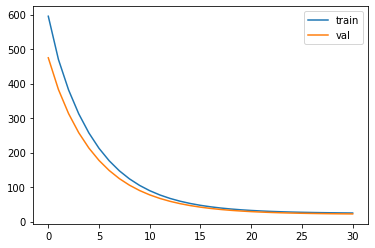

In [79]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label='train')
plt.plot(val_losses,label='val')
plt.legend()
plt.show()